# Actividad Semanal -- 7 Regresiones y K means

#Tecnológico de Monterrey
###Maestría en Inteligencia Artificial Aplicada
######Ciencia y analítica de datos
###### Profesor titular: Maria de la Paz Rico
###### Nancy Elena Estanislao Lizárraga - **A01169334**
###### 9 de noviembre del 2022



# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [141]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 488 kB/s 
     |████████████████████████████████| 1.0 MB 69.8 MB/s 
     |████████████████████████████████| 1.7 MB 53.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 65.7 MB/s 
     |████████████████████████████████| 6.3 MB 56.4 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=2e79f0a784ea7e0fc260c8e33b378603db8d098d93f654bf546b1977b3d17b60
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=112d4be5cdbad903032373865714affb2dbb18cee2768da1b171547ef15e47eb
  Stored in directory: /root/.

In [143]:
# LIBRERIAS NECESARIAS PARA EL PROYECTO
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_validate,RepeatedKFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import geopandas

In [59]:

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
845,5.736109,29.292021
742,5.303579,30.099798
24,1.823289,70.420052
657,5.021861,37.692709
225,3.418841,52.510324
64,2.500418,71.375608
615,4.872785,40.084457
594,4.776329,28.465827
682,5.087086,38.588554
390,4.116452,27.530902


In [60]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=10)

# METRICAS NECESARIAS
metricas = {
    "R2":"r2",
    "MAE":'neg_mean_absolute_error'
}

resultados = list()

In [61]:
len(X)

1000

In [62]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

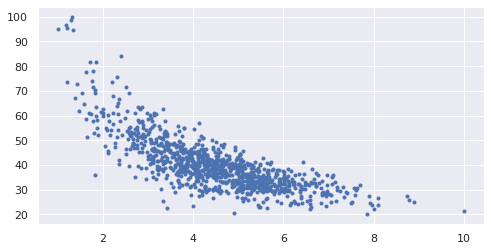

In [63]:
plt.plot(X,y,'b.')

In [64]:
def grafica(y_fit):
  plt.scatter(X, y)

  order = np.argsort(X_test.values.ravel())
  x_order = X_test.values.ravel()[order]
  y_order = y_test.values.ravel()[order]
  y_fit_order = y_fit[order]

  plt.plot(x_order, y_fit_order, 'r-', linewidth=2, label='Predictions')
  plt.xlabel('$X$', fontsize=18)
  plt.ylabel('$y$', fontsize=18)
  plt.legend(loc='upper left',fontsize=14)


In [86]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_train)

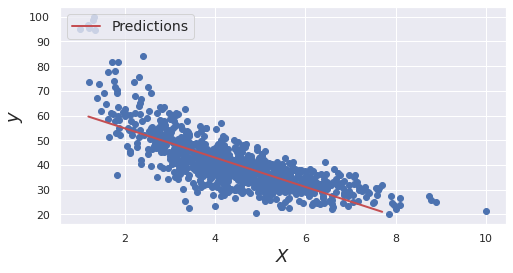

In [87]:
# GRAFICAMOS LOS VALORES OBTENIDOS
y_fit = LR.predict(X_test)
grafica(y_fit)

In [88]:
LR.coef_, LR.intercept_

(array([-5.917708]), 66.6344123257405)

In [89]:
print('MAE:', mean_absolute_error(y_test,y_fit))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,y_fit)))
print('R2_score', r2_score(y_test,y_fit))

MAE: 5.287283133809135
Root Mean Squared Error : 7.27426391400127
R2_score 0.5695617538713827


In [91]:
#polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [92]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-15.79822837,   1.06832436]), 87.51583264485228)

In [71]:
poly_lr.coef_, poly_lr.intercept_

(array([-15.79822837,   1.06832436]), 87.51583264485228)

In [93]:
mae_polynomial = metrics.mean_absolute_error(y_train, y_pred)
r2_polynomial = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.820604017193222
Root Mean Squared Error: 6.77040782877293
r2_score 0.5807583474715297


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


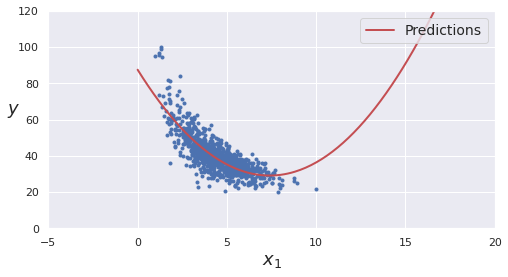

In [94]:
X_new=np.linspace(0, 100, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.axis([-5, 20, 0, 120]);

In [95]:
#Lasso
from sklearn.linear_model import Lasso, Ridge
var_alpha = 0.5

modelo_lasso = Lasso(alpha=var_alpha)
modelo_lasso.fit(X_train,y_train)
y_pred = modelo_lasso.predict(X_train)

In [96]:
mae_lasso = metrics.mean_absolute_error(y_train, y_pred)
r2_lasso = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.7988725965024415
Root Mean Squared Error: 6.780582381904548
r2_score 0.5794973298959796


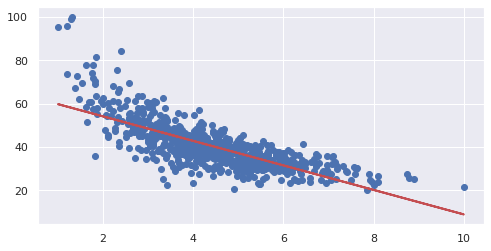

In [97]:
plt.scatter(X_train, y_train);
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions")

In [98]:
#Ridge
var_alpha = 30

modelo_ridge = Ridge(alpha=var_alpha)
modelo_ridge.fit(X_train,y_train)
y_pred = modelo_ridge.predict(X_train)
modelo_ridge.coef_, modelo_ridge.intercept_

(array([-5.79780197]), 66.09890016018242)

In [99]:
mae_ridge = metrics.mean_absolute_error(y_train, y_pred)
r2_ridge = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.809190067231205
Root Mean Squared Error: 6.772332821514439
r2_score 0.580519912243201


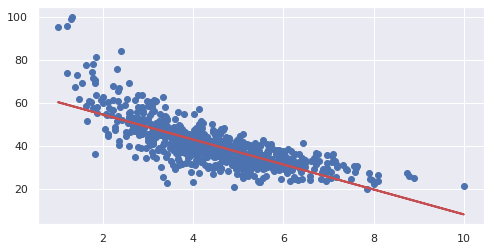

In [100]:
plt.scatter(X_train, y_train);
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions")

In [103]:
mae_lineal = metrics.mean_absolute_error(y_train, y_pred)
r2_lineal = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.809190067231205
Root Mean Squared Error: 6.772332821514439
r2_score 0.580519912243201


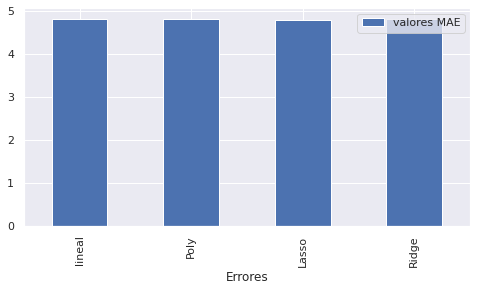

In [104]:
df_mae = pd.DataFrame({'Errores':["lineal","Poly","Lasso","Ridge"], "valores MAE":[mae_lineal,mae_polynomial,mae_lasso,mae_ridge]})
df_mae.plot.bar(x="Errores",y="valores MAE")

**Explica Tus Resultados**

En la práctica, revisando los modelos de la Regresion Lineal, Regresion Polinomial, Ridge y Lasso para R2 y MAE, podemos concluir que el modelo que lanzó mejores resultados es el RIDGE R2, con el siguiente modelo:

𝑦̂ =−15.17𝑋+7.56𝑋2+40.20

Con los siguientes valores:

* Error medio Absoluto (MAE): 4.820604017193222
* Root Mean Squared Error: 6.77040782877293
* r2_score 0.5807583474715297


Se uso un porcentaje del 80% de Informacion para Entrenamiento y 20% para evaluación (como se ha estado manejando en todas las prácticas). Elmodelo polinomial es el mejor porque elcomportamiento es de una curva.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [151]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [152]:
df.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [153]:
latlong=df[["latitude","longitude"]]

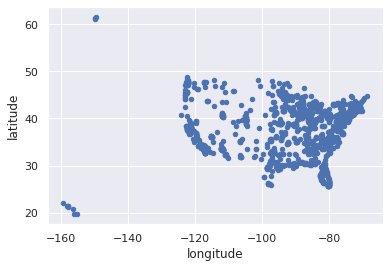

In [154]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [158]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [159]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


In [160]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [161]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [162]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

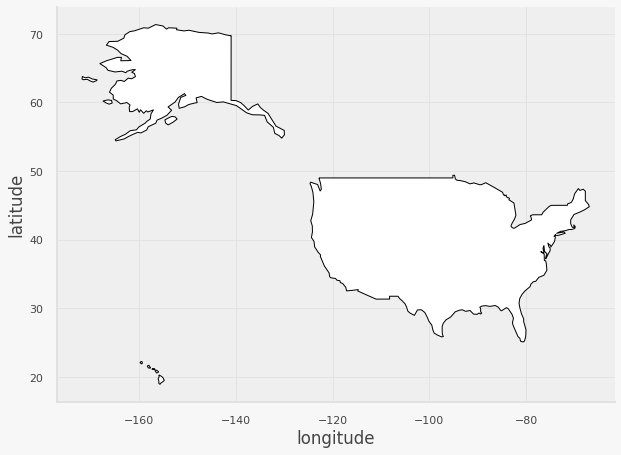

In [163]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

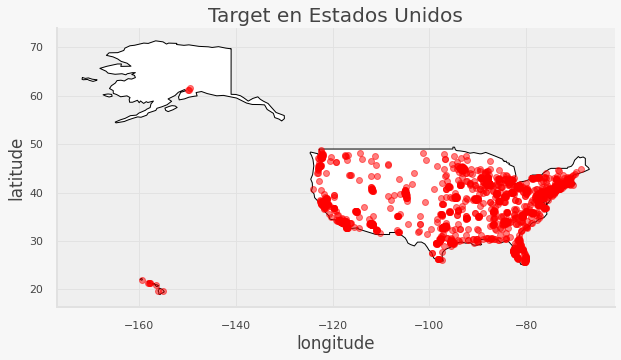

In [164]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [165]:
#tu codigo aquí
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(latlong)
df_latlong = pd.DataFrame(scaler.transform(latlong))
df_latlong.columns = latlong.columns

#Empezaremos por saber cuántos clusters nos da el resultado más "aceptable" para el método KMeans
#Haremos 10 iteraciones y almacenaremos los resultados con el "Squared Error"
k_range = range(1,10)
sse = []

for k in k_range:
  km  = KMeans(n_clusters= k)
  km.fit(df_latlong)
  sse.append(km.inertia_)

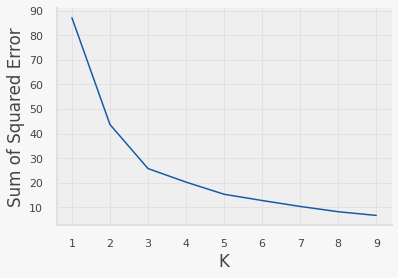

In [166]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_range,sse)

In [167]:
#Declaramos el modelo con el no. de cluster que encontramos
# Y hacemos la predición
model = KMeans(n_clusters=3, max_iter=1000, random_state=0)
y_pred = model.fit_predict(df_latlong)
#scaler.fit(y_pred.reshape(-1, 1))
#y_pred = scaler.transform(y_pred.reshape(-1, 1))
df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = latlong.columns
df_centers

,latitude,longitude
0,0.510160,0.853507
1,0.431103,0.465947
2,0.282981,0.779715


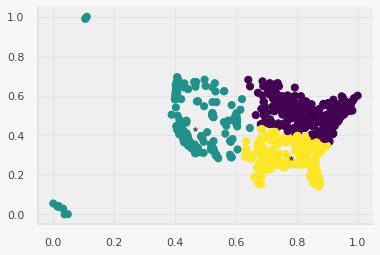

In [168]:
plt.scatter(df_latlong["longitude"], df_latlong["latitude"], c=y_pred, s=50, cmap='viridis')
plt.scatter(df_centers["longitude"], df_centers["latitude"], c='black',marker="*", s=20, alpha=.5);

In [169]:
model = KMeans(n_clusters=5, max_iter=1000, random_state=0)
y_pred = model.fit_predict(df_latlong)
#scaler.fit(y_pred.reshape(-1, 1))
#y_pred = scaler.transform(y_pred.reshape(-1, 1))
df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = latlong.columns
df_centers

,latitude,longitude
0,0.530317,0.741317
1,0.365203,0.457779
2,0.491188,0.908975
3,0.279328,0.779460
4,0.647452,0.417696


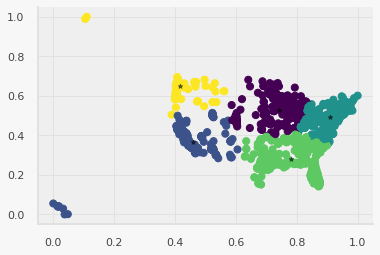

In [170]:
plt.scatter(df_latlong["longitude"], df_latlong["latitude"], c=y_pred, s=50, cmap='viridis')
plt.scatter(df_centers["longitude"], df_centers["latitude"], c='black',marker="*", s=20, alpha=.5);

En esta práctica es la primera vez que veo resultados de manera gráfica, pero en un mapa. Me gustó mcuho la práctica, aunque el grado de dificultad ya fue muucho mayor, sinceramente me costó mucho trabajo y hubieron cosas que no supe interpretar (creo que pediré una asesoría porque no me gustaría seguir adelante con las demás tareas, arrastrando dudas sobre esta).

Por lo tanto,  considero que es importamnte que se grafique un mapa porque, en este caso se ven las coordenadas de donde tenemos que poner los almacenes (que son los puntitos negros que se visualizan en el mapa de arriba) y también podemos visualizar dónde están las tiendas "target" a lo largo de EU. 

geopandas es la librería que usamos para graficar el mapa.